In [37]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [38]:
def load_data_live():
    ''' Load Netflix data set from disk. Load IMDb data sets from IMDb website. Merge on title, write merged
    version to disk.'''
    imdb_names = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", compression='gzip', delimiter = "\t",
                            low_memory = False)
    imdb_ratings = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", compression = 'gzip', delimiter = "\t",
                              low_memory = False)

    # just need the unique id 'tconst'
    imdb_names = imdb_names[['tconst', 'originalTitle']]
    imdb = imdb_ratings.merge(imdb_names, how = 'left', on = 'tconst')

    nflix = nflix.merge(imdb, how = 'left', left_on = 'title', right_on = 'originalTitle')
    nflix.to_csv("data/nflix_merged.csv")
    
    return nflix

# only pull from by API if not on disk
try:
#    print('problem')
    nflix = pd.read_csv("../data/nflix_sub.csv")
except:
    nflix = load_data_live()

In [39]:
nflix = nflix.replace(['None', 'Not Reported', 'not reported', '', ' ', 'NaN'], np.nan, regex=True)
nflix.fillna(value=pd.np.nan, inplace=True)

nflix

<ipython-input-39-cf5d4a7e55f0>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  nflix.fillna(value=pd.np.nan, inplace=True)


,Unnamed: 0,title,director,cast,country,date_added,rating,release_year,duration,description,averageRating,numVotes
0,0,['3%'],NaN,NaN,Brazil,NaN,TV-MA,2020,NaN,NaN,7.8,2053.0
1,1,['3%'],NaN,NaN,Brazil,NaN,TV-MA,2020,NaN,NaN,7.4,21771.0
2,2,['7:19'],NaN,NaN,Mexico,NaN,TV-MA,2016,NaN,NaN,6.0,567.0
3,3,['23:59'],NaN,NaN,Singapore,NaN,R,2011,NaN,NaN,4.6,849.0
4,4,['9'],NaN,NaN,NaN,NaN,PG-13,2009,NaN,NaN,6.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22408,22408,['Zubaan'],NaN,NaN,India,NaN,TV-14,2015,NaN,NaN,6.1,389.0
22409,22409,['Zubaan'],NaN,NaN,India,NaN,TV-14,2015,NaN,NaN,7.3,10.0
22410,22410,NaN,NaN,NaN,NaN,NaN,TV-MA,2019,NaN,NaN,NaN,NaN
22411,22411,NaN,NaN,NaN,Australia,NaN,TV-PG,2019,NaN,NaN,6.9,1864.0


In [40]:
nflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22413 entries, 0 to 22412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22413 non-null  int64  
 1   title          8314 non-null   object 
 2   director       277 non-null    object 
 3   cast           22 non-null     object 
 4   country        7429 non-null   object 
 5   date_added     0 non-null      float64
 6   rating         22406 non-null  object 
 7   release_year   22413 non-null  int64  
 8   duration       0 non-null      float64
 9   description    0 non-null      float64
 10  averageRating  20304 non-null  float64
 11  numVotes       20304 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 2.1+ MB


In [41]:
nflix = nflix[nflix['averageRating'].isna() == False] 

y = nflix['averageRating'].values.ravel()
X = nflix.drop(columns=['averageRating','director', 'cast', 'duration', 'description', 'date_added', 'Unnamed: 0'])

#print('Here!', nflix['averageRating'].isna().sum())

In [42]:

def sepdata(nonan_imp):
    '''separates numerical and categorical variables into subsets
    quant and qual'''    
    for name in nonan_imp.columns:
        if type(nonan_imp[name][1]) == str:
            nonan_imp[name] = nonan_imp[name].astype(str)
        elif type(nonan_imp[name][1]) == int:
            #print(name)
            nonan_imp[name] = nonan_imp[name].astype(int)
        else:
            #nonan_imp[name] = pd.to_numeric(nonan_imp[name])
            nonan_imp[name] = nonan_imp[name].astype(str)

    quant = nonan_imp.select_dtypes(['number', 'float', 'int'])
    #print(quant.head)
    qual = nonan_imp.select_dtypes(['object'])
    #print(qual.head)
    return quant, qual

def prep():
    ''' produces a clean dataframe of X predictors and the y response 
    also encodes categorical variables'''
    fulldf = X
    ''' cut needs to be value between 0 and 1'''
    #nonan = dropcolna(fulldf, cut*len(fulldf))
    #nonan_imp = impute(nonan, 'most_frequent') #can use median here    
    quant, qual = sepdata(X)    
    #nona_enc = nonan_imp
    X_enc = X

    '''
    encoding catergorical variables
    '''    
    le = LabelEncoder()
    X_enc[qual.columns] = X_enc[qual.columns].apply(lambda
                col:le.fit_transform(col))    
#    print(nona_enc.head)    

    #y = y.values.ravel()
    
    return X


quant, qual = sepdata(X)
X = prep()
#y = y.values.ravel()



def dropcolna(nonan):
    ''' takes full dataframe and drops columns with more missingness
    than the number, num, established by the cutoff later'''
    
    for feat in nonan.columns:
        if nonan[feat].isna().sum() > len(nonan):
            nonan.drop([feat], axis=1, inplace=True)
        else:
            '''sanity check for remaining nan'''
            print(feat, nonan[feat].isna().sum())
            pass
    print('new shape:', nonan.shape)
    return nonan

def impute(nonan):
    ''' imputes missing data by specified strategy, used 
    most frequent in this project'''
    values = nonan.values

    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')    
    transformed_X = imp.fit_transform(X)    
    nonan_imp = pd.DataFrame(transformed_X, 
                             columns = [item for item in nonan.columns])
    ''' sanity check to make sure there is no missingness left'''    
    print(nonan_imp)    
    for feat in nonan_imp:
        print('Here!', feat, nonan_imp[feat].isna().sum())
    return nonan_imp 



X = dropcolna(X)
#X_imp = impute(X)
X.info()

title 0
country 0
rating 0
release_year 0
numVotes 0
new shape: (20304, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20304 entries, 0 to 22411
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title         20304 non-null  int64
 1   country       20304 non-null  int64
 2   rating        20304 non-null  int64
 3   release_year  20304 non-null  int64
 4   numVotes      20304 non-null  int64
dtypes: int64(5)
memory usage: 1.6 MB


In [43]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


'''Helper function for cross validation'''
        
def split_folds(k):
    return KFold(n_splits=k, random_state=1, shuffle=True)

'''Models available'''

def lin_reg(X, y):
    ''' linear regression on all predictors'''
    model = {'name':'Linear',
             'mod_type':LinearRegression().fit(X,y),
             'color':'maroon'}
    return model

def lasso_reg(X, y, n):
    ''' lasso regression on all predictors'''
    model = {'name':'Lasso',
             'mod_type':LassoCV(cv = split_folds(n)).fit(X,y),
             'color':'royalblue'}
    return model

def ridge_reg(X, y, n):
    ''' ridge regression on all predictors'''
    model = {'name':'Ridge',
             'mod_type':RidgeCV(cv = split_folds(n)).fit(X,y),
             'color':'deepskyblue'}
    return model

def elastic_net(X, y, n):
    ''' elastic net regression on all predictors'''
    model = {'name':'Elastic Net',
             'mod_type':ElasticNetCV(cv = split_folds(n)).fit(X,y),
             'color':'indigo'}
    return model    

def kneighbors(X, y, search):
    ''' k-nearest neighbors model using boosted tree features
    (see run_models in oopmod.py)'''
    if search == True:
        param_grid = {'n_neighbors': [i for i in range(5,30)],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [i for i in range(20,40)],
              'p': [1, 2]}
        best_mod = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                                scoring='neg_mean_squared_error',cv=5,
                                verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)   
        mod = best_mod.best_estimator_
        print(best_mod.best_params_)
    else: 
        mod = KNeighborsRegressor(algorithm= 'auto', leaf_size= 20,
                                  n_neighbors= 28, p= 1, weights= 'distance')
    model = {'name':'KNN',
             'mod_type':mod.fit(X,y),
             'color':'orchid'}
    return model    
    
def tree_reg(X, y, search):
    ''' decision tree regression model'''
    if search == True:
        param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter': ['best', 'random'],
              'min_samples_split': [0.001, 0.01, 0.1, 0.15],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]}
        best_mod = GridSearchCV(tree.DecisionTreeRegressor(),
                                param_grid=param_grid,
                                scoring='neg_mean_squared_error',cv=5,
                                verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)
        mod = best_mod.best_estimator_
    else:
        mod = tree.DecisionTreeRegressor(criterion= 'mse', max_features= 'auto',
                                         min_impurity_decrease= 0.0,
                                         min_samples_split= 0.1,
                                         splitter= 'random')
    model = {'name':'Tree',
             'mod_type':mod.fit(X,y),
             'color':'olivedrab'}
    return model

def rand_for(X, y, search):
    ''' random forest model'''    
    if search == True:
        param_grid = {'n_estimators':[100],
                'criterion': ['mse', 'friedman_mse', 'mae'],
              'min_samples_split': [0.001, 0.01, 0.1, 0.15],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]}
        best_mod = GridSearchCV(RandomForestRegressor(),
                                param_grid=param_grid,
                                scoring='neg_mean_squared_error',cv=5,
                                verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)    
        mod = best_mod.best_estimator_
    else:
        mod = RandomForestRegressor(criterion= 'friedman_mse',
                                    max_features= 'auto',
                                    min_impurity_decrease= 0.01,
                                    min_samples_split= 0.001,
                                    n_estimators= 100)
    model = {'name':'Random Forest',
             'mod_type':mod.fit(X,y),
             'color':'limegreen'}
    return model

def boost_for(X, y, search):
    '''gradient boosted forest model '''        
    if search == True:
        param_grid = {
                'learning_rate': [0.05, 0.02, 0.1],
              'min_impurity_decrease': [0.001, 0.01, 0.1]}
        best_mod = GridSearchCV(GradientBoostingRegressor(),
                                param_grid=param_grid,
                                scoring='neg_mean_squared_error',cv=5,
                                verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)    
        mod = best_mod.best_estimator_
    else:
        mod = GradientBoostingRegressor(learning_rate=0.05,
                                        min_impurity_decrease = 0.01)
    model = {'name':'Boosted Forest',
             'mod_type':mod.fit(X,y),
             'color':'forestgreen'}
    return model

def supp_vec_reg(X, y, search): 
    ''' support vector regression model using boosted tree features,
    see run_models in oopmod.py'''
    if search == True:
        param_grid = {'kernel': ['linear', 'rbf']}
        
        best_mod = GridSearchCV(SVR(), param_grid=param_grid,
                                scoring='neg_mean_squared_error',
                                cv=5, verbose=True, pre_dispatch='2*n_jobs',
                                n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)
        mod = best_mod.best_estimator_
    else:
        mod = SVR(kernel = 'linear')
    
    model = {'name':'SVR',
             'mod_type':mod.fit(X,y),
             'color':'purple'}
    return model

def mlp(X, y, search):
    ''' multilayer perceptron model using boosted tree features,
    see run_models in oopmod.py'''    
    if search == True:
        param_grid = {'hidden_layer_sizes': [i for i in range(1,15)],
                      'activation': ['relu'], #identity, logistic, tanh
                      'solver': ['adam','sgd'],
                      'learning_rate': ['constant', 'adaptive', 'invscaling'],
                      'learning_rate_init': [0.001, 0.01, 0.1],
                      'alpha': [0.001, 0.01, 0.1],
                      'max_iter': [1000]}
        best_mod = GridSearchCV(MLPRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error',
                           cv=3, verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)
        print(best_mod.best_params_)
        mod = best_mod.best_estimator_ 
    else:
        mod = MLPRegressor(activation= 'relu', alpha= 0.1,
                           hidden_layer_sizes= 4, learning_rate= 'adaptive',
                           learning_rate_init= 0.001, max_iter= 3568,
                           solver= 'lbfgs')
    
    model = {'name':'MLP',
             'mod_type':mod.fit(X,y),
             'color':'goldenrod'}
    return model


In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

#import os
#print(os.getcwd())

#os.chdir('/Users/alyxcleveland/Documents/Complex Systems/Bayes/Final Project')
#print(os.getcwd())


#from dataprep import cleandata, dropcolna, impute, sepdata, prep
#from models import split_folds, lin_reg, lasso_reg, ridge_reg, elastic_net
#from models import kneighbors, tree_reg, rand_for, boost_for, supp_vec_reg, mlp


class learn:
    '''learning class to gather statistics on all models'''
    def __init__(self, model, X, y, k):
        self.model = model['mod_type']
        self.name = model['name']
        self.color = model['color']
        self.X = X
        self.y = y
        self.k = k

    def cross_val(self):
        '''cross validation of train/test MSE and explained variance with
        adjustable number of k folds'''
        scores = cross_validate(self.model, self.X, self.y,
                                cv=split_folds(self.k), 
                                scoring=('r2', 'neg_mean_squared_error', 
                                          'explained_variance'),
                                return_train_score=True,
                                n_jobs=-1)
        self.test_r2 = np.mean(scores['test_r2'])
        self.test_r2_sd = np.std(scores['test_r2'])
        self.test_mse = np.mean(np.abs(scores['test_neg_mean_squared_error']))
        self.test_mse_sd = np.std(scores['test_neg_mean_squared_error'])
        self.test_expvar = np.mean(np.abs(scores['test_explained_variance']))
        self.test_expvar_sd = np.std(np.abs(scores['test_explained_variance']))
        self.score = self.model.score
        
        self.train_r2 = np.mean(scores['train_r2'])
        self.train_r2_sd = np.std(scores['train_r2'])
        self.train_mse = np.mean(np.abs(scores['train_neg_mean_squared_error']))
        self.train_mse_sd = np.std(scores['train_neg_mean_squared_error'])
        self.train_expvar = np.mean(np.abs(scores['train_explained_variance']))
        self.train_expvar_sd = np.std(np.abs(scores['train_explained_variance']))
        print(self.name, 'done cross-validating')
        
    def get_coef(self):
        '''extracts names of coefficients for linear models to make
        feature plots'''
        if type(self.model.coef_[0]) == list:
            coef = pd.Series(self.model.coef_[0], index = self.X.columns)       
        else:
            coef = pd.Series(self.model.coef_, index = self.X.columns)
        
        if self.name == 'Linear':        
            imp_coef = coef[(coef < -1e11)].sort_values()
        elif self.name == 'Lasso':
            imp_coef = coef[(coef > 0.1) | (coef < -0.1)].sort_values()
        else:
            imp_coef = coef[(coef > 1) | (coef < -1)].sort_values()        
        return imp_coef
    
    def get_imp(self):
        ''' extracts names of important features for tree models'''
        importances = pd.Series(self.model.feature_importances_,
                                index=self.X.columns).sort_values()     
        imp = importances[importances > 0.01]
        return imp
    
    def plot_feat(self): 
        ''' makes bar plot for feature importances for linear and tree models'''
        if self.name in ['Linear', 'Lasso', 'Ridge', 'Elastic Net']:
            imp = self.get_coef()
            self.coef = list(imp.index)
        else:
            imp = self.get_imp()
        plt.rcParams.update({'font.size': 30, 'figure.figsize':(10, 20)})
        plt.gcf().subplots_adjust(left=0.3)
        imp.plot(kind = "barh", color=self.color)
        plt.grid(color='gray', which='major', axis='y', linestyle='--', alpha=0.5)        
        plt.xlabel('Feature Importance')
        plt.title(self.name)
        plt.savefig('../out/{}_featimp.png'.format(self.name), dpi=600, bbox_inches='tight')
        plt.show()
        
def run_models(X, y, k):
    ''' runs and collect cross validation statistics for all models
    and returns list of models with statistics to be plotted '''
    
    # linear = learn(lin_reg(X, y), X, y, k)
    # linear.cross_val()
    # print(linear.get_coef())
    lasso = learn(lasso_reg(X, y, k), X, y, k)
    lasso.cross_val()
    ridge = learn(ridge_reg(X, y, k), X, y, k)
    ridge.cross_val()    
    elasnet = learn(elastic_net(X, y, k), X, y, k)
    elasnet.cross_val()        
    tree = learn(tree_reg(X, y, search=False), X, y, k)
    tree.cross_val()
    randfor = learn(rand_for(X, y, search=False), X, y, k)
    randfor.cross_val()
    boostfor = learn(boost_for(X, y, search=False), X, y, k)
    boostfor.cross_val()
    
    boostfor.feat = list(boostfor.get_imp().index)
    X = X[[item for item in X.columns if item in boostfor.feat]] 
    
    knn = learn(kneighbors(X, y, search=False), X, y, k)
    knn.cross_val()    
#     svr = learn(supp_vec_reg(X, y, search=False), X, y, k)
#     svr.cross_val()
#     perc = learn(mlp(X, y, search=False), X, y, k)
#     perc.cross_val()
    
    models = [lasso, ridge, elasnet, knn, tree, randfor, boostfor]
#     models = [linear, lasso, ridge, elasnet, knn, tree, randfor, boostfor]
#     models = [lasso, ridge, elasnet, tree, randfor, boostfor, knn, svr, perc]

    return models
    
def feat_plots(models):
    '''plots feature importance for linear and tree models using the 
    plot_feat function of the learn class'''
    mods = [mod for mod in models if mod.name not in ['KNN', 'SVR', 'MLP']]
    for mod in mods:
        mod.plot_feat()
    
def bias_var(models):
    '''MSE and explained variance plot for all models'''
    fig, ax = plt.subplots(figsize=(15, 10))
    
    for mod in models:
        ax.scatter(mod.test_mse, mod.test_expvar, marker='o',
                    s=200, c=mod.color, alpha=0.7)
        if mod.name in ['Ridge', 'Elastic Net']:
            ax.annotate(mod.name, (mod.test_mse-1000, mod.test_expvar+0.003))
        elif mod.name in ['Linear', 'KNN', 'Tree']:
            ax.annotate(mod.name, (mod.test_mse+0.002, mod.test_expvar-0.01))
        elif mod.name in ['MLP', 'SVR']:
            ax.annotate(mod.name, (mod.test_mse-20000, mod.test_expvar-0.01))        
        else:
            ax.annotate(mod.name, (mod.test_mse, mod.test_expvar))
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Explained Variance')
    plt.savefig('../out/biasvariance.png', dpi=600, bbox_inches='tight')
    plt.show()
    
def tt_mse(models):
    '''train mse vs test mse bar plot for all models'''
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 22})

    train_mse = [mod.train_mse for mod in models]
    train_mse_sd = [mod.train_mse_sd for mod in models]

    test_mse = [mod.test_mse for mod in models]
    test_mse_sd = [mod.test_mse_sd for mod in models]
    
    ind = np.arange(len(models))
    width = 0.35 
    ax.bar(ind, train_mse, width,color=[mod.color for mod in models],
                alpha=0.5, yerr=train_mse_sd)
    ax.bar(ind + width, test_mse, width,
                color=[mod.color for mod in models], yerr=test_mse_sd)
    ax.set_title('Training & Testing MSE')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['Lasso', 'Ridge', 'EN', 'KNN', 'Tree',
                        'RF', 'BF'])
    plt.ylabel('Mean Squared Error')
    plt.savefig('../out/tt_mse.png', dpi=600, bbox_inches='tight')
    plt.show()

def tt_expvar(models):
    '''train explained variance vs test explained variance bar plot
    for all models'''
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 22})

    train_ev = [mod.train_expvar for mod in models]
    train_ev_sd = [mod.train_expvar_sd for mod in models]

    test_ev = [mod.test_expvar for mod in models]
    test_ev_sd = [mod.test_expvar_sd for mod in models]
    
    ind = np.arange(len(models)) 
    width = 0.35 
    ax.bar(ind, train_ev, width,color=[mod.color for mod in models],
                alpha=0.5, yerr=train_ev_sd)
    
    ax.bar(ind + width, test_ev, width,
                color=[mod.color for mod in models], yerr=test_ev_sd)
    ax.set_title('Training & Testing Explained Variance')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['Lasso', 'Ridge', 'EN', 'KNN', 'Tree',
                        'RF', 'BF'])    
   
    plt.ylabel('Explained Variance')
    plt.savefig('../out/tt_ev.png', dpi=600, bbox_inches='tight')
    plt.show()    

def main(X, y):
    ''' main function provides prepared and encoded data to
    run all models and produce plots'''
    
    
    k=5
    models = run_models(X, y, k)
    
    return models
    #feat_plots(models)
#     bias_var(models)
#     tt_mse(models)
#     tt_expvar(models)

# # X, y = prep(0.01, enc=True)

# main(X, y)

#main(X_train, y_train)



Lasso done cross-validating
Ridge done cross-validating
Elastic Net done cross-validating
Tree done cross-validating
Random Forest done cross-validating
Boosted Forest done cross-validating
KNN done cross-validating


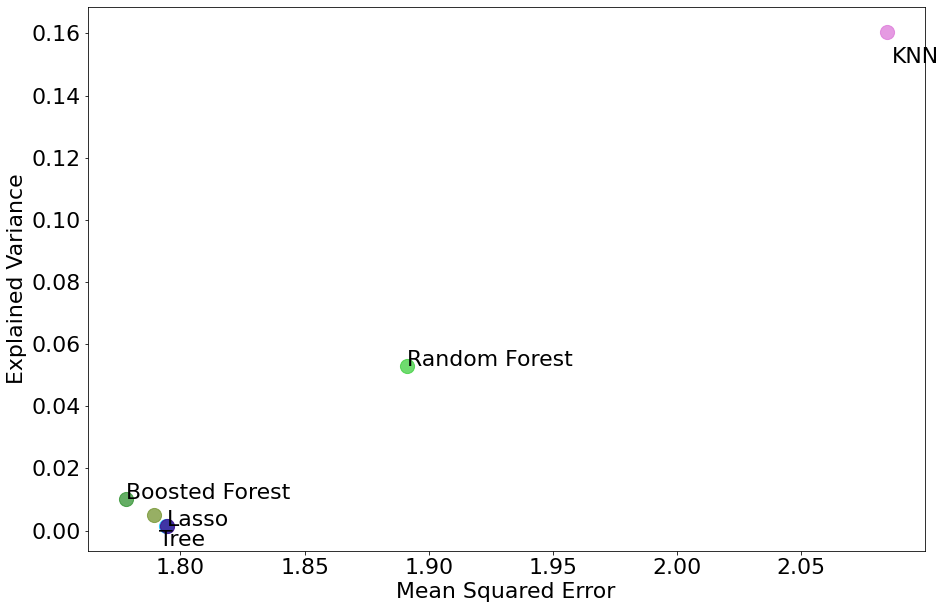

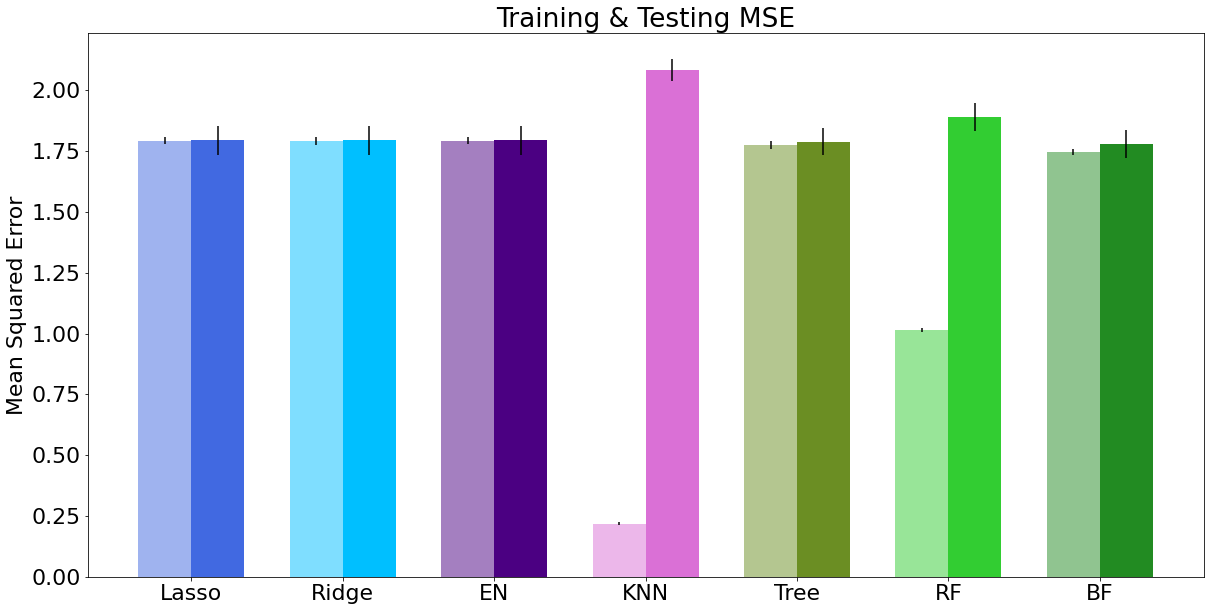

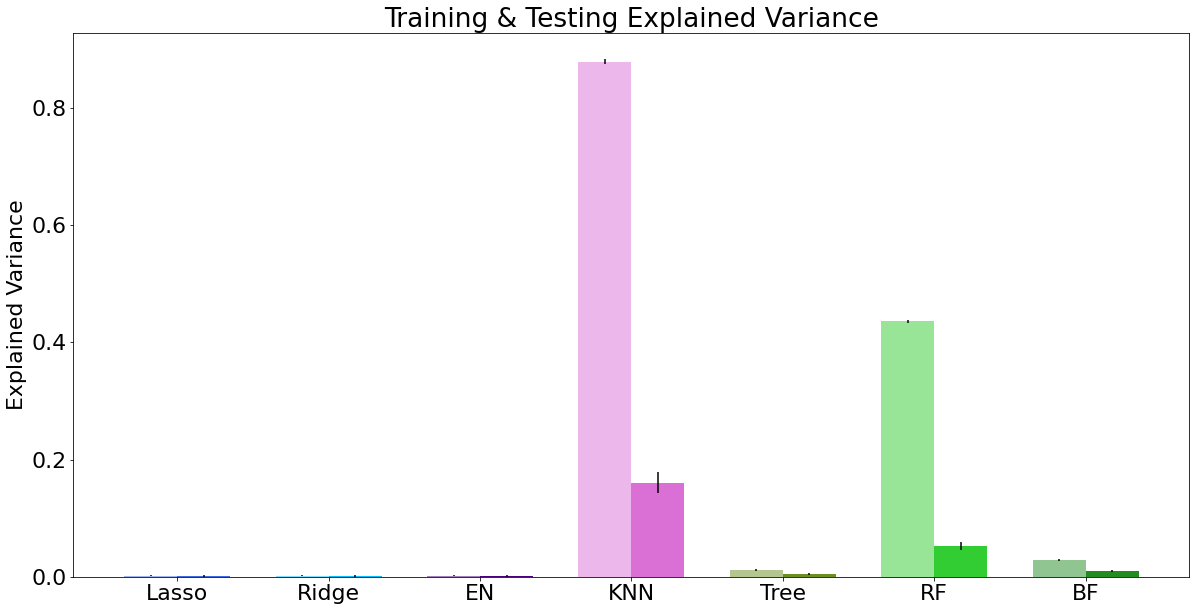

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
models = main(X_train, y_train)

bias_var(models)
tt_mse(models)
tt_expvar(models)